In [4]:
import csv
import numpy as np
from operator import itemgetter, attrgetter
import matplotlib.pyplot as plt




In [13]:
#abc = csv.reader('/home/campus-2/Documents/Projet_arbre/data/arbres.csv', dialect='excel')

#print(abc)
with open('/home/campus-2/Documents/Projet_arbre/data/arbres.csv', newline= '' ) as csvfile:
    arbres_all = csv.reader(csvfile)
    no_info = 0 #counts the number of trees without information of age
    list_only_years = []
    list_years = []
    annees_list = []
    genre_botanique = [] 
    no_botanic = 0
    list_column_id = []
    list_column_code = []
    c7_trees = []
    c8_trees = []
    for j,row in enumerate(arbres_all):
        list_column_id.append(row[0])
        list_column_code.append(row[1])
        annees_list.append(row)
        c7_trees.append(row[7])
        c8_trees.append(row[8])
        #if j == 0 or j ==1 : 
        #    print(row)
        if j > 0 and row[19]!='': 
            list_only_years.append(int(row[19]))
        if row[19]=='':
            no_info = no_info +1
        if j > 0 :  
            genre_botanique.append((row[13] ,row[19]))
            if row[13] == '':
                no_botanic +=1
            
        list_years.append(row[19])
        
print(no_botanic)        
#le nombre des arbres recences, length - 1 car la list contien la premiere ligne    
nb_of_trees = len(annees_list)- 1
#print(nb_of_trees)

# test_annee defind 
print(len(annees_list))
#print(annees[0:49])    
#print(annees[-50:])

# nb arbres without year 

nb_no_info_year = nb_of_trees - len(list_only_years)
print(nb_no_info_year)
nb_of_years = int(max(list_only_years)) - int(min(list_only_years))
print ('We have no information for years :', nb_of_years)
mean_trees_per_year = float(nb_of_trees) / nb_of_years
print(mean_trees_per_year)

print(len(annees_list[2]))

1064
31815
1392
68
467.8529411764706
32


find all indices of one year

In [86]:
index_year = []
nb_arbres = 0

for j,year in enumerate(list_years):
    if year == '1989':
        index_year.append(j)
        #print(annees_list[j])
    elif year > '1989':
        nb_arbres = nb_arbres+1    
        
print(len(index_year))   
print(nb_arbres)
#print(index_year)


302
13049


maire qui a plante le plus

In [4]:
nb_trees_martin = 0
nb_trees_Michallon = 0
nb_trees_Dubedout = 0
nb_trees_Carignon = 0
nb_trees_Destot = 0
nb_trees_Piolle = 0

for j,year in enumerate(list_only_years):
    if year > 1948 and year <1959 : 
        nb_trees_martin +=1
    elif year >= 1959 and year <1965 :
        nb_trees_Michallon += 1
    elif year >= 1965 and year <1983 : 
        nb_trees_Dubedout +=1
    elif year >= 1983 and year <1995 :    
        nb_trees_Carignon +=1
    elif year >= 1995 and year <2014 :   
        nb_trees_Destot +=1
    elif year >= 2014 :    
        nb_trees_Piolle +=1
all_maires = [nb_trees_martin, nb_trees_Michallon, nb_trees_Dubedout , nb_trees_Carignon, nb_trees_Destot,nb_trees_Piolle]
print(max(all_maires))
print(all_maires)

12652
[482, 763, 12652, 4677, 8955, 2893]


Histogramm

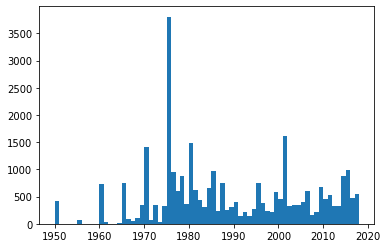

In [6]:
sort_years = list_only_years.sort()

plt.hist(list_only_years, bins = 68)
plt.show()

genre botanique

In [20]:
j = 0
print(len(genre_botanique))
for i,genre in enumerate(genre_botanique):
    if genre[0] == '':
        j=j+1


print(j)    
sorted_genre = sorted(genre_botanique, key=itemgetter(1), reverse=True)
print(sorted_genre[:10])

31814
1064
[('Alnus', '2018'), ('Acer', '2018'), ('Acer', '2018'), ('Acer', '2018'), ('Chionanthus', '2018'), ('Chionanthus', '2018'), ('Chionanthus', '2018'), ('Acer', '2018'), ('Liquidambar', '2018'), ('Salix', '2018')]


# Weird Trees

In [149]:
with open('/home/campus-2/Documents/Projet_arbre/data/weird_trees.csv', newline= '' ) as csvfile:
    weird_trees = csv.reader(csvfile)
    Dict_weird_trees= csv.DictReader(csvfile)
    list_weird_trees = []
    list_column_id_w = []
    list_column_code_w = []
    c2_weird_trees = []
    c7_weird_trees = []
    c8_weird_trees = []

    for ind,row in enumerate(weird_trees):
        list_weird_trees.append(row)
        list_column_id_w.append(row[0])
        list_column_code_w.append(row[1])
        c2_weird_trees.append(row[2])
        c7_weird_trees.append(row[7])
        c8_weird_trees.append(row[8])
 

In [68]:
print('original:' , len(annees_list),len(annees_list[0]) )
print('weird :', len(list_weird_trees),len(list_weird_trees[0]) )
print('differences rows' ,len(annees_list) - len(list_weird_trees))

original: 31815 32
weird : 31244 32
differences rows 571


find the lines which exists not in the weird document

In [136]:
i= 0
j= 0
k=0
#c2_weird_trees = list_weird_trees[:][2]
print('here', len(c2_weird_trees))

for ind,row in enumerate(annees_list):
    only_code_original.append(row[1])
    if row[0] not in list_column_id_w:
        #list_weird_trees.append(row)
        i = i + 1
    if row[1] not in list_column_code_w:
        #list_weird_trees.append(row)
        j = j + 1  
    if row[2] not in c2_weird_trees:
        k=k+1 
        
print(i, j, k)


here 31244
1388 1387 1387
ESP32632
ESP37969


In [153]:
# count the number of differences in col 7 & 8

weird_most_comm = Counter(c7_weird_trees).most_common(10)
print(weird_most_comm)
most_comm = Counter(c7_trees).most_common(10)
print(most_comm)

weird_most_comm = Counter(c8_weird_trees).most_common(10)
print(weird_most_comm)
most_comm = Counter(c8_trees).most_common(10)
print(most_comm)


[('ESP174', 16001), ('ESP151', 11953), ('ESP065', 2215), ('ESP187', 1074), ('SOUS_CATEGORIE', 1)]
[('ESP174', 16348), ('ESP151', 12033), ('ESP065', 2364), ('ESP187', 1069), ('SOUS_CATEGORIE', 1)]
[("Arbre d'espaces ouverts", 16001), ('Arbre de voirie', 11953), ("Arbre d'enceintes fermées", 2215), ('Bois semi naturel', 1074), ('SOUS_CATEGORIE_DESC', 1)]
[("Arbre d'espaces ouverts", 16348), ('Arbre de voirie', 12033), ("Arbre d'enceintes fermées", 2364), ('Bois semi naturel', 1069), ('SOUS_CATEGORIE_DESC', 1)]


In [162]:
# check here if the first column/ id has only numbers and which is the min and max 
'''print(max(list_column_code_w[1:]), max(list_column_code[1:]))
print(max(list_column_id_w[1:]), max(list_column_id[1:]))
print(min(list_column_code_w[1:]), min(list_column_code[1:]))
print(min(list_column_id_w[1:]), min(list_column_id[1:]))

'''

for num, row in enumerate(list_column_id_w):
    if not row.isdecimal():
        print(row)
        print(num)


ELEM_POINT_ID
0


the list weird is sorted by the code or also name colunm 1, 2, the original is not sorted

In [96]:
'''list_weird_trees3 = []
only_code_original = []
for ind,row in enumerate(annees_list):
    only_code_original.append(row[1])
    
    ind_w = list_column_code.index(row[1])
print(max(only_code_original))  
print(max(list_column_code))   ''' 
    
#print(type(row[1]), type(list_column_code) )
    

'list_weird_trees3 = []\nonly_code_original = []\nfor ind,row in enumerate(annees_list):\n    only_code_original.append(row[1])\n    \n    ind_w = list_column_code.index(row[1])\nprint(max(only_code_original))  \nprint(max(list_column_code))   '

# Itération 2

indentifier les différentes genre botanique avec différentes manières et cronometrer

In [10]:
from collections import Counter
list_genres = []
list_especes = [] 
list_an_gen_esp = []
dict_all = {}
with open('/home/campus-2/Documents/Projet_arbre/data/arbres.csv', newline='') as csvfile:
    dict_arbres = csv.DictReader(csvfile)
    
    for i,row in enumerate(dict_arbres):
        
        
        
        #replace \ufeffELEM_POINT_ID by ELEM_POINT_ID
        #['ELEM_POINT_ID' for key in row if key == '\ufeffELEM_POINT_ID' ]
        
        #dict_all = {key:row[key] for key in row }
        #{dict_all[key].append(row[key]) for key in row}
        

        

        list_genres.append(row['GENRE_BOTA'])
        list_especes.append(row['ESPECE'])

        if row['ANNEEDEPLANTATION']!='' :
            list_an_gen_esp.append((row['ANNEEDEPLANTATION'], row['GENRE_BOTA'], row['ESPECE']))



KeyError: '\ufeffELEM_POINT_ID'

In [290]:
liste_mots = ["a", "b", "vqefghrfgh", "des", "refff"]
[mots for mots in liste_mots if len(mots)<3]

['a', 'b']

In [296]:
annees_de_plantation = [row[19] for row in annees_list]

In [299]:
annees_uniques = set(annees_de_plantation)
annees_uniques.remove('')
annees_uniques.remove('ANNEEDEPLANTATION')

In [307]:
test = {year:annees_de_plantation.count(year) for year in annees_uniques}

In [16]:
#%%timeit
botanique = []
i=0
for row in annees_list:
    if row[13] not in botanique: 
        i = i +1
        botanique.append(row[13])   
#print(i-2) #as '' and ''GENRE_BOTA'' is still inside   

['GENRE_BOTA',
 'Acer',
 'Quercus',
 'Salix',
 'Robinia',
 'Fraxinus',
 'Prunus',
 'Platanus',
 'Liriodendron',
 'Pinus',
 'Chamaecyparis',
 'Rhus',
 'Koelreuteria',
 'Cercis',
 'Celtis',
 'Populus',
 'Carpinus',
 'Alnus',
 'Ulmus',
 'Sambucus',
 'Picea',
 'Betula',
 'Liquidambar',
 'Sophora',
 'Tilia',
 'Cedrus',
 'Fagus',
 'Diospyros',
 'Malus',
 'Catalpa',
 'Ilex',
 'Cupressus',
 '',
 'Aesculus',
 'Chionanthus',
 'Pyrus',
 'Juglans',
 'Albizia',
 'Gleditsia',
 'Zelkova',
 'Mespilus',
 'Pterocarya',
 'Pistacia',
 'Phellodendron',
 'Amélanchier',
 'Taxus',
 'Taxodium',
 'Crataegus',
 'Magnolia',
 'Parrotia',
 'Pteroceltis',
 'Morus',
 'Ginkgo',
 'Tetradium',
 'Corylus',
 'Thuja',
 'Castanea',
 'Paulownia',
 'Cephalotaxus',
 'Lagerstroemia',
 'Davidia',
 'Ostrya',
 'Sorbus',
 'Cladastris',
 'Juniperus',
 'Buxus',
 'Cercidiphyllum',
 'Maclura',
 'Chitalpa',
 'Halesia',
 'Sorbopyrus',
 'Hovenia',
 'Ptelea',
 'Poncinos',
 'Libocedrus',
 'Abies',
 'Sciadopitys',
 'Sequoiadendron',
 'Cotinu

In [15]:
%%timeit
botanique = []

for row in annees_list:
    if row[13] not in botanique: 
        botanique.append(row[13])
    
#print(len(botanique))    

22.1 ms ± 563 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [267]:
%%timeit
botanique2 = []
for ind, row in enumerate(annees_list):
    botanique2.append(row[13])

botanique2_set = set(botanique2)

nb_especes = len(botanique2_set)
#print(nb_especes)

114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114
114


In [270]:
botanique2 = dict_all["GENRE_BOTA"]

botanique2_set = set(botanique2)
print(botanique2_set)
nb_especes = len(botanique2_set)
print(nb_especes)

{'A', 'T', 'O', 'N', 'B', 'R', 'E', '_', 'G'}
9


identifier les especes (column 14)

In [17]:
especes_all = []
for ind, row in enumerate(annees_list):
    especes_all.append(row[14])

especes = set(especes_all)

nb_especes = len(especes)
#print(nb_especes)

En utilisant la structure de données ​ Dict ​ compter le nombre de représentants de
chaque genre botanique

In [11]:
#cnt_gen = Counter()

#for genre in list_genres:
#    cnt_gen[genre] += 1

genre_count = Counter(list_genres)
genre_most_comm = Counter(list_genres).most_common(10)

nb_total = len(list_genres)

print('there are ' + str(genre_most_comm[0][1]) + ' ' + genre_most_comm[0][0] + ' that represents ' + str(
    genre_most_comm[0][1] / float(nb_total)*100)+ '% of all trees')
print('there are ' + str(genre_most_comm[1][1]) + ' ' + genre_most_comm[1][0] + ' that represents ' + str(
    genre_most_comm[1][1] / float(nb_total)*100)+ '% of all trees')
print('there are ' + str(genre_most_comm[2][1]) + ' ' + genre_most_comm[2][0] + ' that represents ' + str(
    genre_most_comm[2][1] / float(nb_total)*100)+ '% of all trees')

#Listez tous les représentants uniques de leurs genre botanique
list_names=[]
for name, number in genre_count.items():
    if number == 1:
        list_names.append(name)
        
print('These trees are unique: ', list_names)        

[]


IndexError: list index out of range

In [193]:
cnt_esp = Counter()

#for genre in list_genres:
#    cnt_gen[genre] += 1
espece_count = Counter(list_especes)
espece_most_comm = Counter(list_especes).most_common(10)

nb_total = len(list_especes)

print('there are ' + str(espece_most_comm[0][1]) + ' ' + espece_most_comm[0][0] + ' that represents ' + str(
    espece_most_comm[0][1] / float(nb_total)*100)+ '% of all trees')
print('there are ' + str(espece_most_comm[1][1]) + ' ' + espece_most_comm[1][0] + ' that represents ' + str(
    espece_most_comm[1][1] / float(nb_total)*100)+ '% of all trees')
print('there are ' + str(espece_most_comm[2][1]) + ' ' + espece_most_comm[2][0] + ' that represents ' + str(
    espece_most_comm[2][1] / float(nb_total)*100)+ '% of all trees')

list_names=[]
for name, number in espece_count.items():
    if number == 1:
        list_names.append(name)
print('These trees are unique: ', list_names)               

there are 8742 acerifolia that represents 13.73923429936506% of all trees
there are 6438  that represents 10.118186961714969% of all trees
there are 3796 nigra that represents 5.965926950399195% of all trees
These trees are unique:  []


La diversité des arbres en ville est considérée comme bonne, d’après la règle du 10-20-30.

    pas plus de 10% d’une espèce;
    pas plus de 20% d’un genre;
    pas plus de 30% d’une famille (règle respectée sur le territoire).

-> le maximum d'une espece est 13.7 % alors la diversité n'est pas bonne 
-> pour les genre le maximum est à 16.4, alors la diversité de genre est bien


Comment la pratique de plantation a-t-elle évolué au cours du temps ?
Diversifie-t-on plus maintenant qu’avant ? Vos analyses sont-elles en accord avec
le communiqué de presse ? (plus dur)

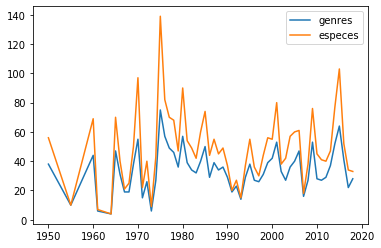

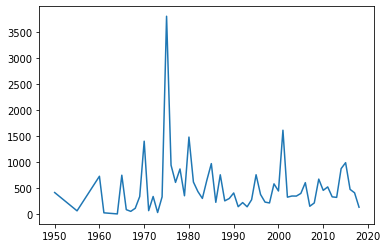

In [252]:
sorted_list = sorted(list_an_gen_esp, key=itemgetter(0) )
set_annees = set(list_only_years)
count_years = Counter(list_only_years)
i1 = 0
i2 = 0

dict_info = {
    "year" : [],
    "number" : [],
    "genre" : [],
    "espece" : [] }

for i, year in enumerate(set_annees):
    numbers = count_years[year]
    i2 += numbers
    sous_list_gen = []
    sous_list_esp = [] 
    for i in range(i1,i2):
        sous_list_gen.append(list_an_gen_esp[i][1])
        sous_list_esp.append(list_an_gen_esp[i][2])
    nb_gen =  len(set(sous_list_gen))   
    nb_esp =  len(set(sous_list_esp))   

    dict_info["year"].append(year)
    dict_info["number"].append(numbers)
    dict_info["genre"].append(nb_gen)
    dict_info["espece"].append(nb_esp)
    
    #print(year,numbers,nb_gen,nb_esp)
    i1 += numbers

plt.plot(dict_info["year"],dict_info["genre"], label = 'genres' )
plt.plot(dict_info["year"],dict_info["espece"], label = 'especes')
plt.legend()   

plt.figure()
plt.plot(dict_info["year"],dict_info["number"])
plt.show()


Sur  l'ensemble  du  territoire,  la  Ville  de  Grenoble  a  choisi d'accentuer  la  diversité  des espèces.En 2006, Grenoble en comptait 292 contreplus de 500 espèces en 2017.Des  nombreux  arbres  fruitiers  ont aussi été  plantés  par  le  service  des  espaces  verts  de  la Ville  notamment  dans  le  parc  Pompidou,  face  au  jardin  partagé  du  village  olympique,  ou encore  allée  de la  Sylphide.  Ces  plantations,  contrairement  aux  espèces  utilisées pour  les alignements, génèrent des interactions avec les habitants.



{1950, 1955, 1960, 1961, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018}


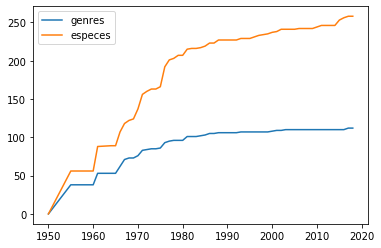

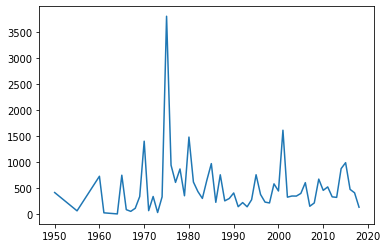

In [254]:
sorted_list = sorted(list_an_gen_esp, key=itemgetter(0) )
set_annees = set(list_only_years)
print(set_annees)
count_years = Counter(list_only_years)
i1 = 0

dict_info = {
    "year" : [],
    "number" : [],
    "genre" : [],
    "espece" : [] }

for i, year in enumerate(set_annees):
    numbers = count_years[year]
    sous_list_gen = []
    sous_list_esp = [] 
    for i in range(0,i1):
        sous_list_gen.append(list_an_gen_esp[i][1])
        sous_list_esp.append(list_an_gen_esp[i][2])
    nb_gen =  len(set(sous_list_gen))   
    nb_esp =  len(set(sous_list_esp))   

    dict_info["year"].append(year)
    dict_info["number"].append(numbers)
    dict_info["genre"].append(nb_gen)
    dict_info["espece"].append(nb_esp)
    
    #print(year,numbers,nb_gen,nb_esp)
    i1 += numbers

plt.plot(dict_info["year"],dict_info["genre"], label = 'genres' )
plt.plot(dict_info["year"],dict_info["espece"], label = 'especes')
plt.legend()   

plt.figure()
plt.plot(dict_info["year"],dict_info["number"])
plt.show()

print()